In [5]:
import pandas as pd
import ml_helper
from sklearn.metrics import roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns

In [10]:
df = pd.read_csv('../../Results/probability_resultsduring_hypo_5_probas.csv')


In [14]:
df.y_hypo

0      False
1      False
2      False
3      False
4       True
       ...  
973    False
974    False
975    False
976    False
977    False
Name: y_hypo, Length: 978, dtype: bool

In [11]:
df.head()

,bout_id,before_TIR_lv2_hypo,before_TIR_lv1_hypo,before_TIR_hypo,before_TIR_norm,before_TIR_hyper,before_TIR_lv1_hyper,before_TIR_lv2_hyper,before_TIR_hypo_exercise,before_TIR_normal_exercise,...,probas_xgb_simp,probas_xgb_simp_fold,probas_lr_glyc,probas_lr_glyc_fold,probas_xgb_glyc,probas_xgb_glyc_fold,probas_lr_ts,probas_lr_ts_fold,probas_xgb_ts,probas_xgb_ts_fold
0,3046_675,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,100.0,...,0.534135,1,0.166125,1,0.726409,1,0.132608,1,0.510617,1
1,3046_678,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,100.0,...,0.064066,4,0.167974,4,0.022543,4,0.138579,4,0.002314,4
2,3046_674,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,100.0,...,0.157334,2,0.404142,2,0.868260,2,0.480229,2,0.734898,2
3,3046_676,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,100.0,...,0.146307,0,0.285637,0,0.011705,0,0.258788,0,0.147804,0
4,3046_680,0.0,50.0,50.0,50.0,0.0,0.0,0.0,75.0,25.0,...,0.067248,5,0.786705,5,0.661435,5,0.835011,5,0.867799,5


## Simple model

In [15]:
subgroup_df = df[['bout_id','ID','age','bmi','sex','start_glc','duration','form_of_exercise', 'time_of_day','hba1c','cpep','y_hypo', 'probas_lr_two']]

In [16]:
id_key = pd.read_csv('../1_preprocessing/id_key.csv').drop_duplicates()

In [17]:
#during_hypo = during_hypo.merge(id_key, on='ID')
during_hypo = subgroup_df.merge(id_key, on='bout_id', how='inner')

<AxesSubplot:>

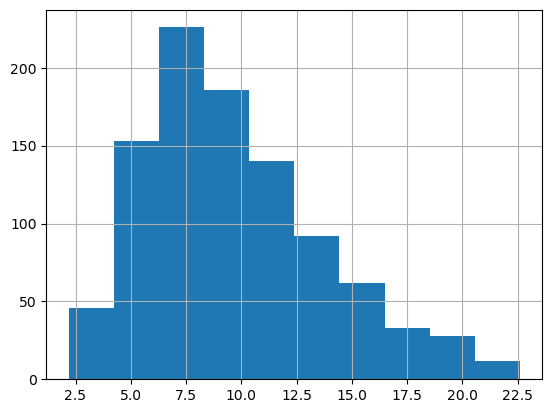

In [21]:
during_hypo.start_glc.hist() #title='Starting glucose'

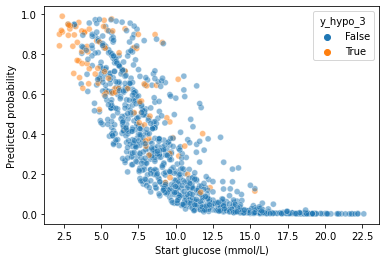

In [57]:
fig, ax = plt.subplots()
ax = sns.scatterplot(during_hypo.start_glc, during_hypo.probas_lr_two, hue=during_hypo.y_hypo_3, alpha=0.5)
ax.set_xlabel('Start glucose (mmol/L)')
ax.set_ylabel('Predicted probability')
#fig.savefig('scatter_during_3.svg')

In [71]:
during_hypo.head()

,before_TIR_lv2_hypo,before_TIR_lv1_hypo,before_TIR_hypo,before_TIR_norm,before_TIR_hyper,before_TIR_lv1_hyper,before_TIR_lv2_hyper,before_TIR_hypo_exercise,before_TIR_normal_exercise,before_TIR_hyper_exercise,before_number_hypos,before_avg_length_of_hypo,before_total_time_in_hypos,before_number_lv1_hypos,before_number_lv2_hypos,before_number_hypos_below_5,before_avg_length_hypo_below_5,before_total_time_in_hypos_below_5,before_sd,before_cv,before_minimum_glucose,before_maximum_glucose,before_average_glucose,before_mage_mean,before_ea1c,before_percent_missing,ID,intensity,month,day,day_of_week,time_of_day,duration,form_of_exercise,start_glc,y_hypo,age,sex,years_since_diagnosis,bmi,hba1c,cpep,stratify,predicted,predicted_proba
0,0.0,20.0,20.0,46.666667,33.333333,33.333333,0.000000,26.666667,73.333333,0.000000,1,30.0,30.0,1,0,1,46.0,46.0,2.892848,38.063794,3.2,10.8,7.60000,5.8,6.408805,7.33,3004,14.0,6,13,2,evening,37.0,aer,10.4,False,30.047912,male,21.560575,24.957697,55.0,3.0,3004_False,0.0,0.164611
1,0.0,12.5,12.5,75.000000,12.500000,12.500000,0.000000,43.750000,50.000000,6.250000,1,15.0,15.0,1,0,2,37.5,75.0,2.616287,42.411949,3.6,12.1,6.16875,8.2,5.508648,0.43,3004,14.0,7,6,4,evening,58.0,aer,11.9,False,30.047912,male,21.560575,24.957697,55.0,3.0,3004_False,0.0,0.143539
2,0.0,0.0,0.0,18.750000,81.250000,81.250000,0.000000,0.000000,68.750000,31.250000,0,0.0,0.0,0,0,0,0.0,0.0,1.518278,13.274558,8.3,13.3,11.43750,5.0,8.822327,0.00,3018,15.0,6,18,0,evening,35.0,aer,13.4,False,30.913073,female,22.395619,22.309356,57.0,3.0,3018_False,0.0,0.062199
3,0.0,20.0,20.0,46.666667,33.333333,20.000000,13.333333,40.000000,33.333333,26.666667,1,30.0,30.0,1,0,1,76.0,76.0,4.116517,53.461263,3.4,14.3,7.70000,6.5,6.471698,0.46,3027,12.0,6,5,1,afternoon,60.0,aer,12.1,False,27.663244,female,23.310062,27.514848,67.0,3.0,3027_False,0.0,0.131660
4,0.0,0.0,0.0,75.000000,25.000000,6.250000,18.750000,0.000000,75.000000,25.000000,0,0.0,0.0,0,0,0,0.0,0.0,4.128635,48.679555,5.4,16.5,8.48125,10.5,6.963050,0.00,3032,18.0,6,16,5,morning,50.0,aer,16.4,False,55.572895,female,35.394935,27.660138,59.0,3.0,3032_False,0.0,0.033212


In [22]:
during_hypo['start_glc_bin'] = pd.qcut(during_hypo['start_glc'], q=3)
during_hypo['bmi_bin'] = pd.qcut(during_hypo['bmi'], q=3)
during_hypo['age_bin'] = pd.qcut(during_hypo['age'], q=3)
during_hypo['duration_bin'] = pd.qcut(during_hypo['duration'], q=3)
during_hypo['hba1c_bin'] = pd.qcut(during_hypo['hba1c'], q=3)

In [25]:
def roc(df):
    return pd.DataFrame([[roc_auc_score(df.y_hypo, df.probas_lr_two),
                          #accuracy_score(df.y_hypo_3, df.probas_lr_two), 
                          df.shape[0],
                          len(set(df.ID_y)), df.y_hypo.mean()]], columns=['roc', 'bouts',
                                                      'participants', 'ratio hypos'])

## Study

In [26]:
during_hypo.groupby('study').apply(roc).round(3)

,,roc,bouts,participants,ratio hypos
study,,,,,
extod_101,0,0.826,533,34,0.225
extod_edu,0,0.866,445,58,0.225


In [27]:
during_hypo.groupby(['sex']).apply(roc).round(3)

,,roc,bouts,participants,ratio hypos
sex,,,,,
female,0,0.854,515,43,0.235
male,0,0.828,463,49,0.214


In [28]:
during_hypo.groupby(['study', 'sex']).apply(roc).round(3)

roc  bouts  participants  ratio hypos
study     sex                                              
extod_101 female 0  0.854    324            20        0.259
          male   0  0.753    209            14        0.172
extod_edu female 0  0.859    191            23        0.194
          male   0  0.877    254            35        0.248

In [29]:
during_hypo.groupby(['time_of_day']).apply(roc).round(3)

,,roc,bouts,participants,ratio hypos
time_of_day,,,,,
afternoon,0,0.861,214,65,0.271
evening,0,0.833,348,70,0.264
morning,0,0.848,416,75,0.168


In [30]:
during_hypo.groupby(['form_of_exercise']).apply(roc).round(3)

,,roc,bouts,participants,ratio hypos
form_of_exercise,,,,,
aer,0,0.844,778,89,0.230
ana,0,0.934,102,28,0.167
mix,0,0.815,97,30,0.247


#### BMI

<AxesSubplot:>

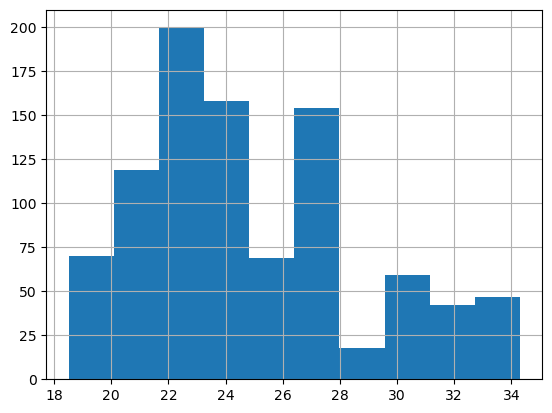

In [ ]:
during_hypo.bmi.hist()

In [ ]:
during_hypo.bmi.hist()

In [31]:
during_hypo.groupby(['bmi_bin']).apply(roc).round(3)

,,roc,bouts,participants,ratio hypos
bmi_bin,,,,,
"(18.517, 22.914]",0,0.804,333,26,0.204
"(22.914, 26.523]",0,0.849,306,32,0.199
"(26.523, 34.294]",0,0.874,297,28,0.269


In [32]:
during_hypo.groupby(['duration_bin']).apply(roc).round(3)

,,roc,bouts,participants,ratio hypos
duration_bin,,,,,
"(9.999, 35.0]",0,0.926,329,67,0.176
"(35.0, 60.0]",0,0.831,444,80,0.234
"(60.0, 120.0]",0,0.760,205,69,0.283


In [33]:
during_hypo.groupby(['start_glc_bin']).apply(roc).round(3)

,,roc,bouts,participants,ratio hypos
start_glc_bin,,,,,
"(2.1990000000000003, 7.4]",0,0.745,335,68,0.457
"(7.4, 10.9]",0,0.712,320,80,0.162
"(10.9, 22.6]",0,0.880,323,75,0.046


In [34]:
during_hypo.groupby(['age_bin']).apply(roc).round(3)

,,roc,bouts,participants,ratio hypos
age_bin,,,,,
"(19.766, 44.742]",0,0.841,332,38,0.190
"(44.742, 52.049]",0,0.840,311,26,0.206
"(52.049, 80.159]",0,0.840,303,27,0.277


In [35]:
during_hypo.groupby(['hba1c_bin']).apply(roc).round(3)

,,roc,bouts,participants,ratio hypos
hba1c_bin,,,,,
"(41.999, 53.0]",0,0.779,325,24,0.295
"(53.0, 61.0]",0,0.876,354,35,0.220
"(61.0, 88.0]",0,0.833,243,29,0.148


In [ ]:
during_hypo = pd.read_csv(filenames[1])

In [ ]:
during_hypo_split.groupby('study').apply(lambda group: accuracy_score(group.y_hypo, group.predicted_proba))

In [72]:
during_hypo.groupby('ID').apply(lambda group: accuracy_score(group.y_hypo, group.predicted)).describe()

count    88.000000
mean      0.834875
std       0.174037
min       0.333333
25%       0.744318
50%       0.881176
75%       1.000000
max       1.000000
dtype: float64